In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
class Map():
    
    def __init__(self, size):
        self.size = size
        self.xs = np.random.randint(1, 99, size)
        self.ys = np.random.randint(1, 99, size)

class Tour():
    
    def __init__(self, m):
        self.m = m
        self.cities = np.arange(self.m.size)
        np.random.shuffle(self.cities)
        
    def clone(self):
        c = Tour(self.m)
        c.cities = np.copy(self.cities)
        return c
    
    def distance(self):
        d = 0
        for i in range(self.m.size):
            d += np.sqrt((self.m.xs[self.cities[i]] - self.m.xs[self.cities[(i + 1) % self.m.size]]) ** 2 + 
                         (self.m.ys[self.cities[i]] - self.m.ys[self.cities[(i + 1) % self.m.size]]) ** 2)
        return d        
    
    def swap(self, i, j):
        t = self.cities[i]
        self.cities[i] = self.cities[j]
        self.cities[j] = t
        
    def mutate(self):
        i, j = np.random.randint(0, self.m.size, 2)
        self.swap(i, j)
    
    def crossover(self, other):
        i, j = np.random.randint(0, self.m.size, 2)
        a = min(i, j)
        b = max(i, j)
        newa = -1 * np.ones(self.m.size, dtype=np.int)
        newb = -1 * np.ones(self.m.size, dtype=np.int)
        for x in range(a, b + 1):
            newa[x] = other.cities[x]
            newb[x] = self.cities[x]
        for t, v in ((newa, self), (newb, other)):
            c = 0
            i = 0
            while c < v.m.size:
                if t[c] != -1:
                    c += 1
                else:
                    if v.cities[i] not in t:
                        t[c] = v.cities[i]
                        c += 1
                    i += 1    
        self.cities = newa
        other.cities = newb
    
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal')
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        myx = []
        myy = []
        for i in range(self.m.size):
            myx.append(self.m.xs[self.cities[i]])
            myy.append(self.m.ys[self.cities[i]])
        ax.plot(myx, myy)
        ax.scatter(myx, myy)

In [11]:
psize = 200
size = 50
iter = 100
mutation_rate = 0.15

world = Map(size)
population = []
for p in range(psize):
    population.append(Tour(world))

2290.9548167698904

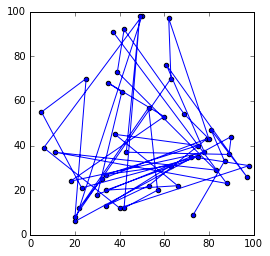

In [12]:
population[2].plot()
population[2].distance()

2221.8662087790058

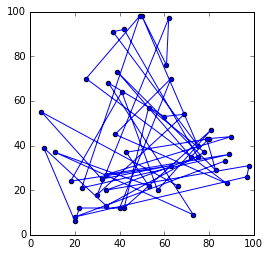

In [13]:
population[3].plot()
population[3].distance()

In [14]:
def evoalg(pop, iterations):
    bestever
    
    for i in range(iterations):
        
        # evaluate (use the distance function)
        
        # select (Tournament)
        newpop = []
        for p in range(len(pop)):
            a, b = np.random.randint(0, len(pop), 2)
            if pop[a].distance() < pop[b].distance():
                newpop.append(pop[a].clone())
            else:
                newpop.append(pop[b].clone())
        pop = newpop
        
        # crossover
        for p in range(0, len(pop), 2):
            pop[p].crossover(pop[p + 1])
        
        # mutation
        for p in range(len(pop)):
            if np.random.random() < mutation_rate:
                pop[p].mutate()

        best = pop[0].distance()
        bestn = 0
        ave = best
        for m in range(1, len(pop)):
            ave += pop[m].distance()
            if pop[m].distance() < best:
                best = pop[m].distance()
                bestn = m
        ave /= len(pop)
        print(i, best, ave)      

    return bestn, pop

In [15]:
b, pop = evoalg(population, iter)

0 1867.54092681 2241.50024925
1 1935.06290933 2196.95669876
2 1850.33454957 2155.7158437
3 1698.85598468 2104.19989761
4 1750.26645748 2065.88257055
5 1703.19498409 2040.7684996
6 1709.94600156 2010.69593766
7 1716.32565546 1988.92268132
8 1564.02791416 1959.69626419
9 1531.70663019 1928.41341152
10 1535.55836051 1907.72009504
11 1621.91046556 1901.70343978
12 1492.56707835 1892.30062922
13 1548.33283331 1898.78674093
14 1521.25969075 1898.33570353
15 1547.04782316 1895.86222319
16 1401.90241302 1877.30892944
17 1443.9493613 1855.95183994
18 1521.85754395 1860.20468441
19 1479.73748085 1842.58620479
20 1545.62233005 1829.63037658
21 1545.62233005 1829.60774648
22 1523.58716332 1836.02122838
23 1523.6615566 1838.81537399
24 1442.50354053 1837.66232793
25 1575.9462765 1834.14714383
26 1556.17005329 1828.90799905
27 1507.14528608 1832.04502609
28 1464.93366744 1811.75184588
29 1546.4235592 1822.89053791
30 1440.89556047 1819.22218071
31 1509.86772183 1816.50522306
32 1488.50751012 1806.60

1432.6554672419504

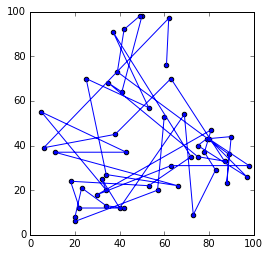

In [16]:
pop[b].plot()
pop[b].distance()